In [3]:
# استدعاء المكتبات 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# مسار البيانات المستخدمة
data_path = 'Data/Car_Price.csv'

# سحب البيانات من خلال المسار
data = pd.read_csv(data_path)

# اختيار القيم الرقمية فقط
data = data.select_dtypes(include=np.number) 

# استعراض البيانات
data.head(15)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


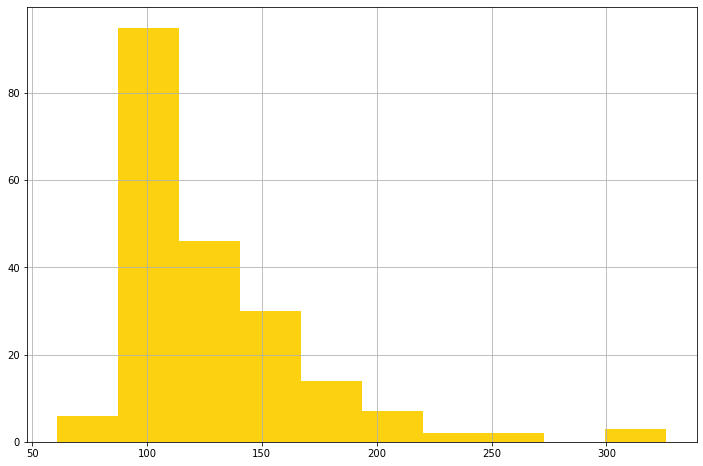

In [37]:
data.enginesize.hist(figsize = (12,8), color='#fcd10f');

In [6]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test


test_result = normaltest(data.enginesize.values)
test_result

NormaltestResult(statistic=95.91743381072065, pvalue=1.4852306016639641e-21)

In [7]:
# D'Agostino K^2 Test | اختبار داجوستينو 

# استدعاء الدالة المخصصة لعمل الاختبار
from scipy.stats.mstats import normaltest 

# إجراء الاختبار
test_result = normaltest(data.enginesize.values)
print(test_result)

NormaltestResult(statistic=95.91743381072065, pvalue=1.4852306016639641e-21)


In [8]:
import seaborn as sns

NormaltestResult(statistic=25.996755020818014, pvalue=2.2639997446532582e-06)

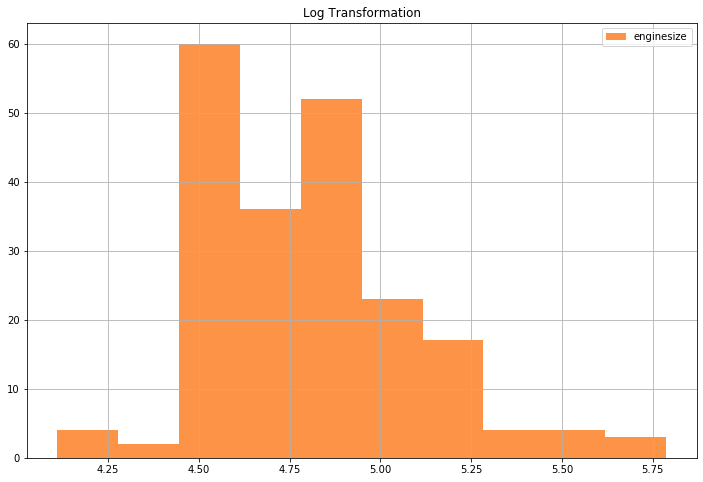

In [10]:
# استخدام التحويل اللوغاريتمي على ميزة سعة المحرك
eng_size_log = np.log(data.enginesize)

# الرسم البياني الجديد بعد التحويل اللوغاريتمي
eng_size_log.hist(figsize = (12,8), color='#FD9347', legend=True);
plt.title('Log Transformation')

# اختبار داجوستينو
normaltest(eng_size_log)

NormaltestResult(statistic=57.700117332162804, pvalue=2.9551444793420665e-13)

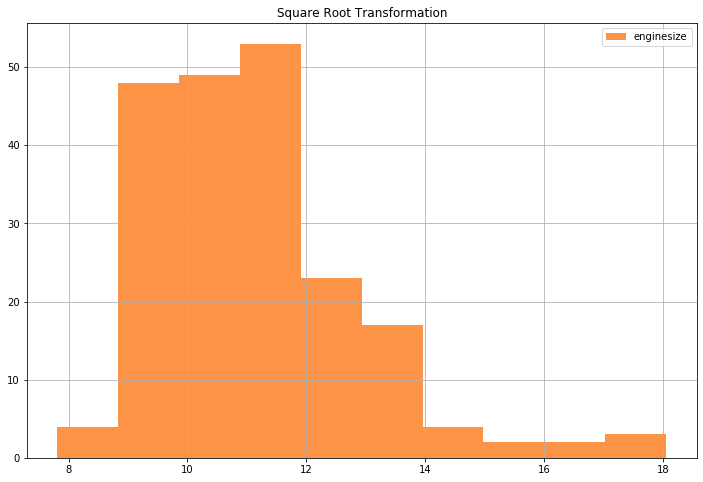

In [11]:
# استخدام تحويل الجذر التربيعي  على ميزة سعة المحرك
eng_size_sqrt = np.sqrt(data.enginesize)

# الرسم البياني الجديد بعد التحويل 
eng_size_sqrt.hist(figsize = (12,8), color='#FD9347', legend=True);
plt.title('Square Root Transformation')

# اختبار داجوستينو
normaltest(eng_size_sqrt)

In [21]:
from scipy.stats import boxcox

# 
bc_result = boxcox(data.enginesize)

# مصفوفة تشكل التوزيع الجديد بعد التحويل
eng_size_boxcox = bc_result[0] 

# قيمة لامدا التي استخدمت في التحويل
lambda_value = bc_result[1] 

print(lambda_value)
print(40 * '-')
print(eng_size_boxcox[0:10]) 



-0.9617338982169858
----------------------------------------
[1.03015272 1.03015272 1.03149794 1.02837347 1.03056192 1.03056192
 1.03056192 1.03056192 1.03022347 1.03022347]


In [ ]:
from scipy.stats import boxcox

# التحويل باستخدام صندوق كوكس | Cox Box Transformation
bc_result = boxcox(data.enginesize)

# مصفوفة تشكل التوزيع الجديد بعد التحويل
eng_size_boxcox = bc_result[0] 

# قيمة لامدا التي استخدمت في التحويل
lambda_value = bc_result[1] 

print(lambda_value)

NormaltestResult(statistic=0.9736238923417837, pvalue=0.6145825966887986)

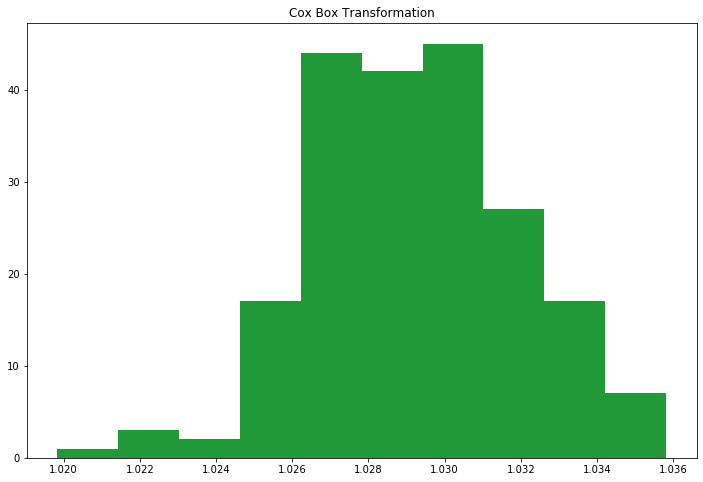

In [36]:
# الرسم البياني الجديد بعد التحويل
plt.figure(figsize=(12,8)) 
plt.hist(eng_size_boxcox, color ='#229938')
plt.title('Cox Box Transformation')

# اختبار داجوستينو
normaltest(eng_size_boxcox)

In [45]:
# التحويل باستخدام صندوق كوكس | Cox Box Transformation
bc_result_pr = boxcox(data.price)

# مصفوفة تشكل التوزيع الجديد بعد التحويل
price_boxcox_pr = bc_result_pr[0] 

# قيمة لامدا التي استخدمت في التحويل
lambda_value_pr = bc_result_pr[1] 

print(lambda_value_pr)

-0.6280809555716815


NormaltestResult(statistic=16.727142005583726, pvalue=0.00023321005129893173)

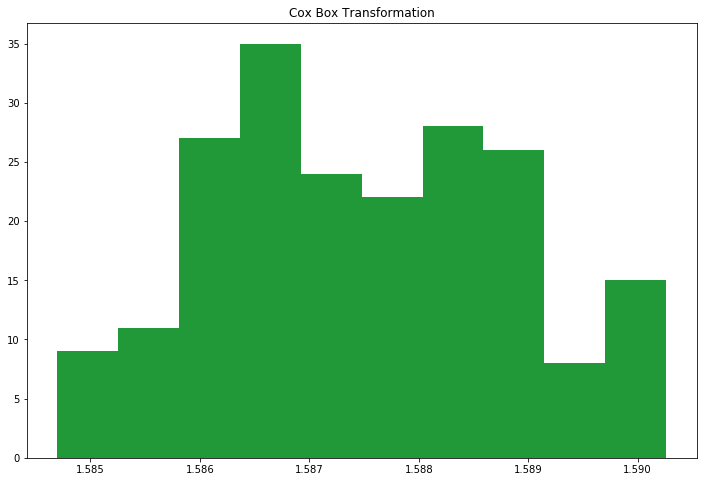

In [46]:
# الرسم البياني الجديد بعد التحويل
plt.figure(figsize=(12,8)) 
plt.hist(price_boxcox_pr, color ='#229938')
plt.title('Cox Box Transformation')

# اختبار داجوستينو
normaltest(price_boxcox_pr)

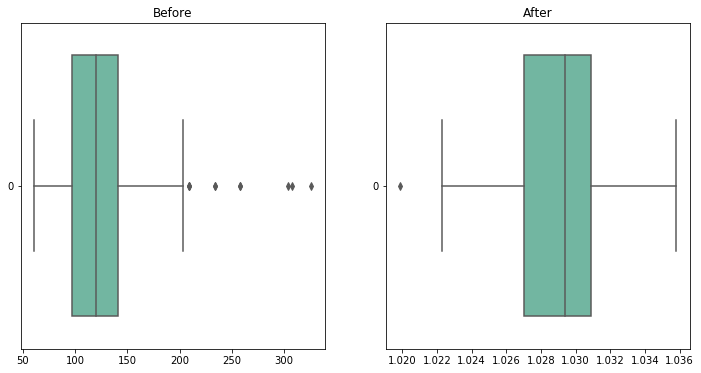

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot الرسم البياني الصندوقي 

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

axs[0].set_title('Before')
axs[1].set_title('After')

sns.boxplot(data=data.enginesize, orient="h", palette="Set2", ax=axs[0])
sns.boxplot(data=eng_size_boxcox, orient="h", palette="Set2", ax=axs[1])

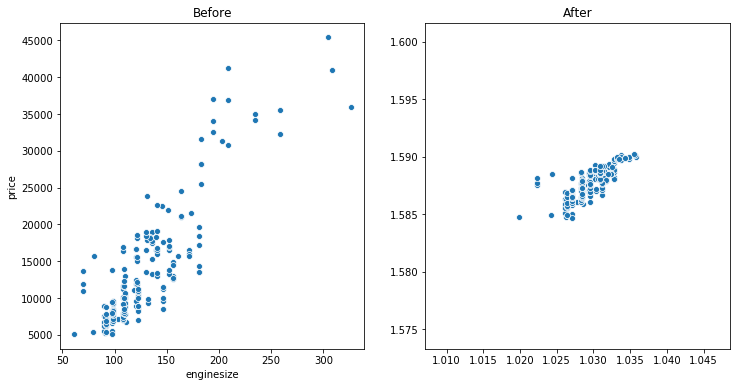

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Box Plot الرسم البياني الصندوقي 

axs[0].set_title('Before')
axs[1].set_title('After')

sns.scatterplot(x=data.enginesize ,y=data.price, ax=axs[0])
sns.scatterplot(x=eng_size_boxcox ,y= price_boxcox_pr, ax=axs[1])
